In [2]:
import skrf as rf
import matplotlib.pyplot as plt
import numpy as np
import cmath as cm
import math
import sympy as sp
from sympy.solvers import solve
pi = math.pi

#Prints out numbers without "np.flat64" displaying
np.set_printoptions(legacy='1.25')

## Problem 2.19

In [2]:
ZL = complex(80,-40)
Zo = complex(100,0)
Zg = 100

Gamma = (ZL-Zo)/(ZL+Zo)
print(Gamma)
Gamma_angle = np.angle(Gamma)
Gamma_mag = abs(Gamma)
Gamma_polar =[Gamma_mag,Gamma_angle]
print(Gamma_polar)
Vg = 10
Vo = Vg*(Zg/(Zg+Zo))

(-0.058823529411764705-0.23529411764705882j)
[0.24253562503633297, -1.8157749899217608]


In [3]:
#sanity check that .exp handles complex() correctly
print(np.exp(complex(1,1)))
print(abs(complex(1,1)))
print(np.angle(complex(1,1)))

(1.4686939399158851+2.2873552871788423j)
1.4142135623730951
0.7853981633974483


In [4]:
#the values of Bz we input into the equation that satisfy -1.5l<=z<=0
#100 points from -3pi to 0
input = np.linspace((-3*pi),0,num=100)
#print(f'input={input}')

Vz = [0] * len(input) #somewhere to store the calculated results
k=0 #Vz index to be incremented.

#calculate Vz(z) for -1.5l<=z<=0 and store in vector "Vz"
for Bz in input :
    Vz[k] = Vo*(np.exp(complex(0,-Bz))+Gamma_mag*np.exp((complex(0,Bz+Gamma_angle))))
    k+=1

#print(f'output={Vz}')


x_array = [element / (3*pi) for element in input] #scale Bz to be fraction of l, -l<z<0 (Bz = -3pi when z=-l) for x-axis
y_array = [abs(element) for element in Vz] #magnitude of Vz for y-axis

Text(0, 0.5, 'Magnitude (V)')

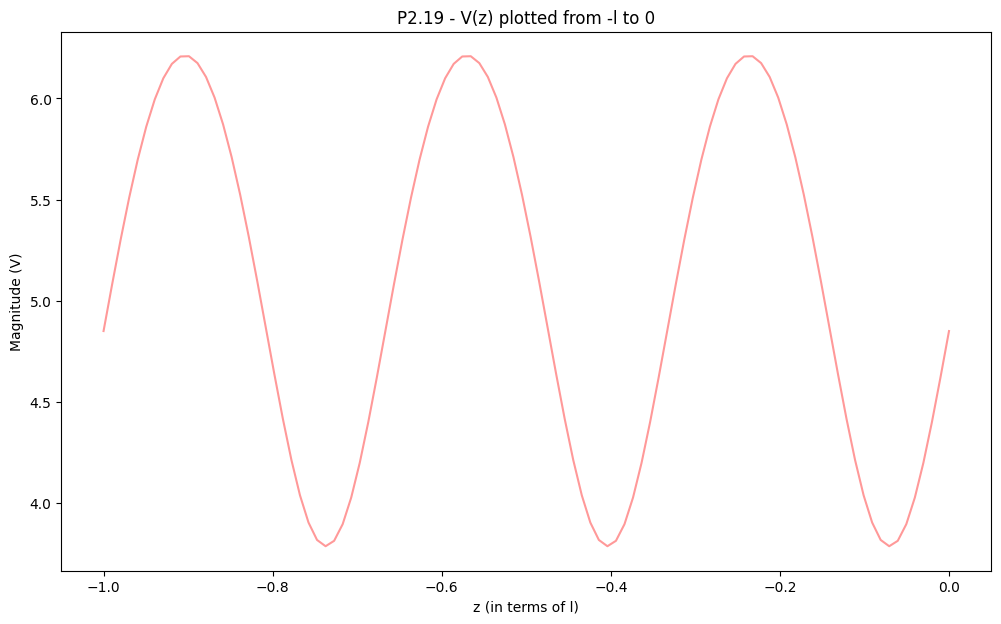

In [5]:
fig = plt.figure(figsize = (12,7))

plt.plot(x_array,y_array, alpha = 0.4, label='V(z)', color='red')
plt.title('P2.19 - V(z) plotted from -l to 0')
plt.xlabel('z (in terms of l)')
plt.ylabel('Magnitude (V)')

In [23]:
# for i in range(0, len(x_array)) :
#     print('Bl = {:<25} |V(z)| = {:<40}'.format(x_array[i],  y_array[i]))

# for i in range(0, len(x_array)) :
#     print(f'Bl = {x_array[i]}')

# for i in range(0, len(y_array)) :
#     print(f'|V(z)| = {y_array[i]}')

Bl = -1.0
Bl = -0.9898989898989898
Bl = -0.9797979797979799
Bl = -0.9696969696969697
Bl = -0.9595959595959596
Bl = -0.9494949494949496
Bl = -0.9393939393939394
Bl = -0.9292929292929293
Bl = -0.9191919191919191
Bl = -0.9090909090909092
Bl = -0.898989898989899
Bl = -0.8888888888888888
Bl = -0.8787878787878789
Bl = -0.8686868686868687
Bl = -0.8585858585858586
Bl = -0.8484848484848485
Bl = -0.8383838383838385
Bl = -0.8282828282828283
Bl = -0.8181818181818182
Bl = -0.8080808080808082
Bl = -0.797979797979798
Bl = -0.787878787878788
Bl = -0.7777777777777778
Bl = -0.7676767676767677
Bl = -0.7575757575757576
Bl = -0.7474747474747475
Bl = -0.7373737373737373
Bl = -0.7272727272727273
Bl = -0.7171717171717171
Bl = -0.7070707070707071
Bl = -0.6969696969696969
Bl = -0.6868686868686869
Bl = -0.6767676767676768
Bl = -0.6666666666666666
Bl = -0.6565656565656565
Bl = -0.6464646464646465
Bl = -0.6363636363636364
Bl = -0.6262626262626262
Bl = -0.6161616161616161
Bl = -0.6060606060606061
Bl = -0.5959595959

## Problem 2.24

In [19]:
Zo = 75
ZL = 40
Z1 = np.sqrt(Zo*ZL)

input = np.linspace(0.5,2,num=100) # vector of f from 0.5 to 2 in over 100 slices
SWR = [999] * len(input)

#Calculate SWR for every f value
index=0
for f in input :
    Zin = Z1*((ZL+complex(0,Z1*np.tan((pi/2)*f)))/(Z1+complex(0,ZL*np.tan((pi/2)*f))))
    ref_mag = abs((Zin-Zo)/(Zin+Zo)) #reflection coefficient magnitude
    SWR[index] = (1+ref_mag)/(1-ref_mag)

    index+=1

x_array = [element for element in input] #frequency = x-axis
y_array = [element for element in SWR] #SWR = y-axis

Text(0, 0.5, 'SWR')

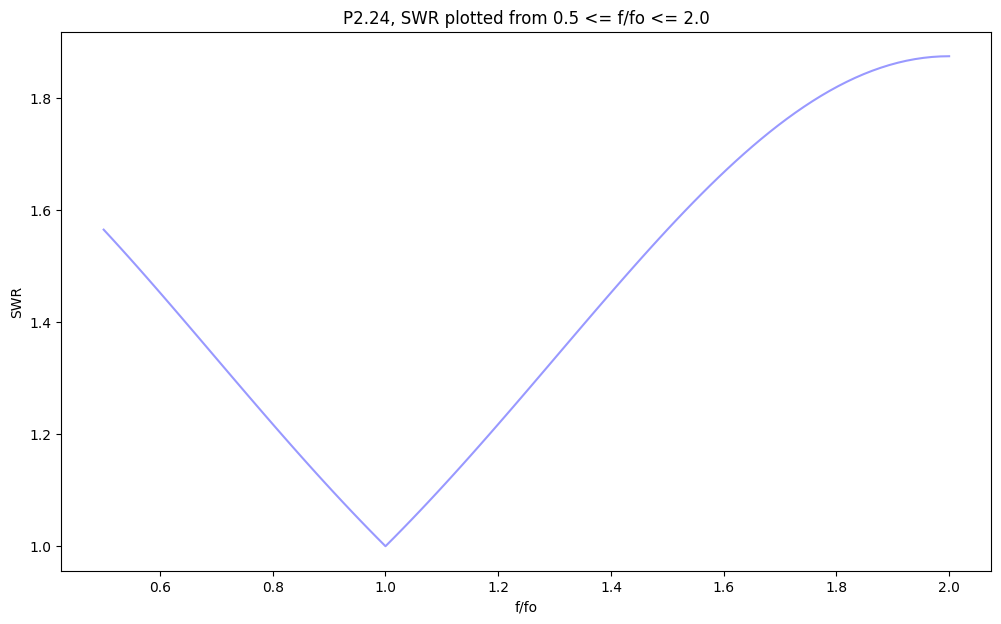

In [22]:
#Plotting the data
fig = plt.figure(figsize = (12,7))

plt.plot(x_array,y_array, alpha = 0.4, label='V(z)', color='blue')
plt.title('P2.24, SWR plotted from 0.5 <= f/fo <= 2.0')
plt.xlabel('f/fo')
plt.ylabel('SWR')